# 10 火锅案例分析

## 库准备

In [1]:
## 前期准备：加载所需工具包
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import jieba
import jieba.analyse
import collections
import squarify
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import statsmodels.formula.api as smf 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"         #变量自动显示
pd.set_option('display.max_columns', None)          #显示所有列
matplotlib.rcParams['font.sans-serif'] = ['Adobe Heiti Std']
matplotlib.rcParams['font.family']='sans-serif'

## 数据准备

#### 读取数据

In [2]:
path = '../data'
data = pd.read_excel(os.path.join(path, 'group_buying.xlsx'), encoding = 'utf-8', index = False)    #读取团购数据
comment = pd.read_excel(os.path.join(path, 'comment.xlsx'), encoding = 'utf-8', index = False)   #读取评论数据

In [3]:
data.tail()            #查看data的数据示例
data.info()          #查看data的数据量、缺失情况及数据类型
comment.tail()    #查看comment的数据示例
comment.info()   #查看comment的数据量、缺失情况及数据类型

,团购活动ID,团购名称,店名,购买人数,团购评分,团购评价数,团购价,市场价,内容丰富度,是否为代金券,有效期,是否周末节假日通用,是否需要预约,停车场,是否限制使用人数,可否叠加使用,是否限制使用张数,是否仅限大厅使用,可否外带,是否提供免费WiFi,图片数量,关键词,城市,店铺评分,店铺评论数,地址,行政区,菜品,连锁店数量,店铺团购数量,上线时长,色相,饱和度,亮度,信息熵,人均
1567,40734743,麻辣森林100元代金券,麻辣森林串串香,9,0.0,0,69.9,100.00,1,1,380,1,0,免费停车位,0,1,0,0,1,0,0,火锅,zz,5.0,4,郑州市上街区淮阳路与欢乐金街交叉口向西100米路南（欢乐金街9号楼M01）,上街区,['暂无菜品'],1,1,197,0.0,0.0,0.0,0.0,88.0
1568,41044592,鱼米养生6人火锅套餐,鱼米火锅,7,4.0,1,188.0,296.00,1,0,1727,1,0,免费停车位,1,1,0,1,0,1,0,火锅,zz,4.8,14,郑州市登封市市区嵩山路北段（七星街居委会）正德苑斜对面路西,登封市,['暂无菜品'],1,4,111,0.0,0.0,0.0,0.0,88.0
1569,4704654,鱼库烤全鱼双人餐,鱼库烤全鱼(西亚斯店),494,4.4,76,78.0,108.00,5,0,1090,1,0,免费停车位,0,1,0,1,1,1,0,火锅,zz,4.5,287,郑州市新郑市Y005(解放路)花悦城辣椒厨房向北150米路西,新郑市,"['生菜', '鱼豆腐', '瓜子', '白菜', '草鱼', '潮汕牛肉丸', '牛肉丸'...",1,5,1074,0.0,0.0,0.0,0.0,28.5
1570,4704775,鱼库烤全鱼4-6人餐,鱼库烤全鱼(西亚斯店),681,4.6,118,98.0,145.00,7,0,1090,1,0,免费停车位,0,1,0,1,1,1,0,火锅,zz,4.5,287,郑州市新郑市Y005(解放路)花悦城辣椒厨房向北150米路西,新郑市,"['生菜', '鱼豆腐', '瓜子', '白菜', '草鱼', '潮汕牛肉丸', '牛肉丸'...",1,5,1074,0.0,0.0,0.0,0.0,28.5
1571,32727097,黑鱼郭我家酸菜鱼6至8人餐,黑鱼郭我家酸菜鱼(中原万达店),28,4.5,2,288.0,350.55,1,0,744,1,0,无停车位,1,1,0,1,0,1,0,火锅,zz,4.7,207,郑州市中原区中原路与秦岭路交叉口中原万达广场金街3号门东30米路南（摩登美发沙龙隔壁）,中原区,"['黄金米饼', '凉拌腐竹', '爽口萝卜', '红油皮蛋', '雪花原汁麦', '香辣金...",1,3,709,0.0,0.0,0.0,0.0,42.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1571
Data columns (total 36 columns):
团购活动ID        1345 non-null int64
团购名称          1345 non-null object
店名            1345 non-null object
购买人数          1345 non-null int64
团购评分          1345 non-null float64
团购评价数         1345 non-null int64
团购价           1345 non-null float64
市场价           1345 non-null float64
内容丰富度         1345 non-null int64
是否为代金券        1345 non-null int64
有效期           1345 non-null int64
是否周末节假日通用     1345 non-null int64
是否需要预约        1345 non-null int64
停车场           1345 non-null object
是否限制使用人数      1345 non-null int64
可否叠加使用        1345 non-null int64
是否限制使用张数      1345 non-null int64
是否仅限大厅使用      1345 non-null int64
可否外带          1345 non-null int64
是否提供免费WiFi    1345 non-null int64
图片数量          1345 non-null int64
关键词           1345 non-null object
城市            1345 non-null object
店铺评分          1345 non-null float64
店铺评论数         1345 non-null int64
地址            1345 non-null ob

,团购活动ID,用户ID,用户名,评价时间,评价内容,评分,消费门店,用户排名
77268,9914034,364679158,我****0,2016-03-20 02:15:51,环境好，好吃实惠,5,奇鱼夫(北金店),2277
77269,9914034,364541173,1****9,2016-03-19 06:33:30,挺好的。,5,奇鱼夫(北金店),2276
77270,9914034,364441412,杜****0,2016-03-19 08:53:18,貌似店里的厨师换了…,5,奇鱼夫(北金店),2276
77271,9914034,362502943,蓝****t,2016-03-06 05:38:11,味道挺好的，稍微有点辣。其它还好！继续加油！,4,奇鱼夫(北金店),2264
77272,9914034,362142288,嫣****凡,2016-03-04 07:57:31,说实话 真差劲 吃个饭 等两个小时,1,奇鱼夫(北金店),2259


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44845 entries, 0 to 77272
Data columns (total 8 columns):
团购活动ID    44845 non-null int64
用户ID      44845 non-null int64
用户名       44845 non-null object
评价时间      44845 non-null object
评价内容      44845 non-null object
评分        44845 non-null int64
消费门店      44845 non-null object
用户排名      44845 non-null int64
dtypes: int64(4), object(4)
memory usage: 3.1+ MB


#### 转换数据类型

In [4]:
change_list = ['停车场', '是否为代金券', '是否周末节假日通用', '是否需要预约', '是否限制使用人数', '可否叠加使用', 
      '是否限制使用张数', '是否仅限大厅使用', '可否外带', '是否提供免费WiFi', '行政区']        #列出所需转换的字段
data[change_list] = data[change_list].astype(object)       #将分类变量转化为object类型

In [5]:
data.describe()                         #输出data中数值型数据的基本统计信息
data.describe(include = ['O'])     #输出data中分类型数据的基本统计信息

,团购活动ID,购买人数,团购评分,团购评价数,团购价,市场价,内容丰富度,有效期,图片数量,店铺评分,店铺评论数,连锁店数量,店铺团购数量,上线时长,色相,饱和度,亮度,信息熵,人均
count,1.345000e+03,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,2.670563e+07,571.469145,2.942082,45.181413,132.192773,198.656729,3.427509,780.959851,6.994796,4.019703,331.959851,4.686989,4.066171,655.500372,88.156725,102.007495,152.679600,7.108611,50.891450
std,1.511098e+07,3796.932398,2.182969,235.605940,114.349574,336.999033,4.413283,356.828847,6.743326,1.470622,728.062678,11.691573,2.507001,336.392009,22.771379,34.293440,42.064861,1.675730,32.785582
min,3.156440e+05,0.000000,0.000000,0.000000,0.180000,2.500000,1.000000,150.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,8.025414e+06,5.000000,0.000000,0.000000,79.000000,100.000000,1.000000,460.000000,4.000000,4.300000,6.000000,1.000000,2.000000,398.000000,86.338579,88.064194,144.166440,7.358893,31.000000
50%,3.584451e+07,36.000000,4.300000,3.000000,98.000000,140.000000,1.000000,731.000000,6.000000,4.500000,71.000000,1.000000,4.000000,621.000000,92.769922,102.277898,161.592572,7.530578,41.500000
75%,3.891762e+07,228.000000,4.700000,22.000000,158.000000,217.000000,5.000000,1006.000000,8.000000,4.700000,309.000000,1.000000,5.000000,948.000000,99.238217,119.960613,175.728659,7.651654,59.000000
max,4.174771e+07,115796.000000,5.000000,7424.000000,1688.000000,9000.000000,38.000000,2721.000000,86.000000,5.000000,9417.000000,46.000000,16.000000,1838.000000,134.657621,227.576084,232.442875,7.927899,375.000000


,团购名称,店名,是否为代金券,是否周末节假日通用,是否需要预约,停车场,是否限制使用人数,可否叠加使用,是否限制使用张数,是否仅限大厅使用,可否外带,是否提供免费WiFi,关键词,城市,地址,行政区,菜品
count,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345
unique,1186,479,2,2,2,4,2,2,2,2,2,2,1,2,479,27,398
top,100元代金券,热波特(奥特莱斯店),0,1,0,免费停车位,0,1,0,1,0,1,火锅,zz,郑州市中牟县郑开大道与S223省道交叉口东北角奥特莱斯购物广场2层,金水区,['暂无菜品']
freq,13,16,1034,1103,1279,651,750,1149,1155,1109,865,1143,1345,965,16,156,177


## 变量处理

#### 构造变量

In [6]:
data['年均销量'] = 365*data['购买人数']/data['上线时长']     #构造年均销量变量
data['折扣'] = data['团购价']/data['市场价']                        #构造折扣变量

##构造菜品丰富度
def get_dish_num(x):
    if x == "['暂无菜品']":
        return 0
    else:
        dish_num = len(x.split(','))
        return dish_num
data['菜品丰富度'] = data['菜品'].apply(get_dish_num)

#### 对数处理

In [7]:
data['log_年均销量'] = np.log(data['年均销量'] + 1)
data['log_团购评价数'] = np.log(data['团购评价数'] + 1)
data['log_图片数量'] = np.log(data['图片数量'] + 1)
data['log_店铺评论数'] = np.log(data['店铺评论数'] + 1)

#### 连续变量离散化

In [8]:
##团购评分以4.5为界分段
data.loc[data['团购评分'] < 4.5, '团购评价'] = '较差'
data.loc[data['团购评分'] >= 4.5, '团购评价'] = '良好'

##店铺评分以4.5为界分段
data.loc[data['店铺评分'] < 4.5, '店铺评价'] = '较差'
data.loc[data['店铺评分'] >= 4.5, '店铺评价'] = '良好'

##将连锁店数量转化为是否为连锁店变量
data.loc[data['连锁店数量'] == 1, '是否为连锁店'] = '否'
data.loc[data['连锁店数量'] > 1, '是否为连锁店'] = '是'

##将色相按高低分段
data.loc[data['色相'] <= 99, '色相分段'] = '低色相'
data.loc[data['色相'] > 99, '色相分段'] = '高色相'

##将饱和度按高低分段
data.loc[data['饱和度'] <= 43, '饱和度分段'] = '低饱和度'
data.loc[data['饱和度'] > 43, '饱和度分段'] = '高饱和度'

##将亮度按高低分段
data.loc[data['亮度'] <= 46, '亮度分段'] = '低亮度'
data.loc[data['亮度'] > 46, '亮度分段'] = '高亮度'

##将信息熵按高低分段
data.loc[data['信息熵'] <= 7.1, '信息熵分段'] = '低信息熵'
data.loc[data['信息熵'] > 7.1, '信息熵分段'] = '高信息熵'

##将人均按照0-30、30-50、50-70、70-90、90以上分段
def divide_per_capita(x):
    if x <= 30:
        return '0~30'
    elif x <= 50:
        return '30~50'
    elif x <= 70:
        return '50~70'
    elif x<= 90:
        return '70~90'
    else:
        return '90以上'
data['人均分段'] =data['人均'].apply(divide_per_capita)

##将折扣按0-5折、5-7折、7-9折、9折以上分段
def divide_discount(x):
    if x <= 0.5:
        return '0~5折'
    elif x <= 0.7:
        return '5~7折'
    elif x <= 0.9:
        return '7~9折'
    else:
        return '9折以上'
data['折扣分段'] =data['折扣'].apply(divide_discount)

## 数据集分割

In [9]:
## 将团购数据集按归属地不同划分为西安和郑州两个部分
西安 = data[data['城市'] == 'xa']
郑州 = data[data['城市'] == 'zz']
西安评论 = comment[comment.团购活动ID.isin(西安['团购活动ID'])]
郑州评论 = comment[comment.团购活动ID.isin(郑州['团购活动ID'])]

In [10]:
## 查看数据量
西安.shape[0]
郑州.shape[0]
西安评论.shape[0]
郑州评论.shape[0]

380

965

10246

23566

## 数据描述

#### 年均销量概述

(array([202., 174., 189., 254., 186., 161., 111.,  38.,  18.,   4.,   8.]),
 array([ 0.        ,  0.94449035,  1.8889807 ,  2.83347106,  3.77796141,
         4.72245176,  5.66694211,  6.61143246,  7.55592281,  8.50041317,
         9.44490352, 10.38939387]),
 <a list of 11 Patch objects>)

Text(0.5, 0, 'log_年均销量')

Text(0, 0.5, '频数')

Text(0.5, 1.0, 'log_年均销量分布')

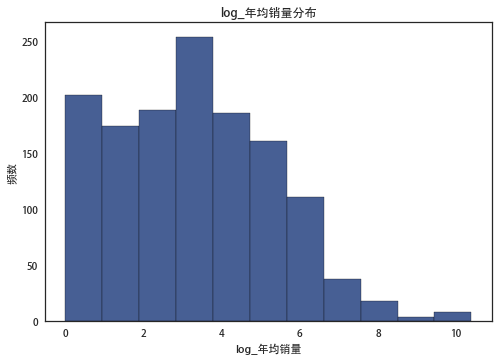

In [11]:
## 绘制全部团购log_年均销量直方图
sns.set(style="white", color_codes=True, font = 'Adobe Heiti Std')
fig = plt.subplots()                                        #创建子图
plt.hist(data['log_年均销量'], color = sns.xkcd_rgb['dusky blue'], edgecolor='black', bins = 11)   #绘制直方图
plt.xlabel('log_年均销量')                           #设置x轴标签
plt.ylabel('频数')                                      #设置y轴标签
plt.title('log_年均销量分布')                       #设置图标题
plt.show()

Text(0.5, 1.0, '西安与郑州log_年均销量对比')

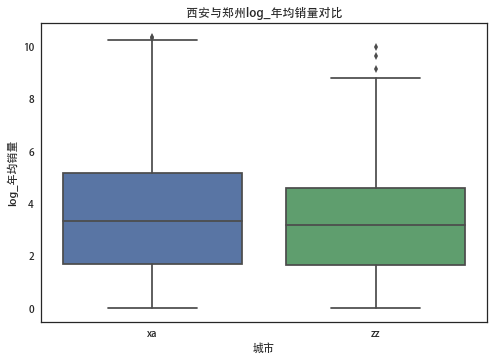

In [12]:
## 西安和郑州的对数年均销量对比
ax = sns.boxplot(x = "城市", y = "log_年均销量", data = data)    #绘制箱线图
ax.set_title('西安与郑州log_年均销量对比')    #设置图标题
plt.show()

#### 分类变量描述

In [13]:
##创建分类变量列表
cat = ['停车场', '是否为代金券', '是否周末节假日通用', '是否需要预约', '是否限制使用人数', '可否叠加使用', 
       '是否限制使用张数', '是否仅限大厅使用', '可否外带', '是否提供免费WiFi', '团购评价', '店铺评价', 
       '是否为连锁店', '人均分段', '折扣分段', '色相分段', '饱和度分段', '亮度分段', '信息熵分段', '行政区']

##创建箱线图绘图函数
def cat_plot(a):
    for i in cat:
        ax = sns.boxplot(x = i, y = 'log_年均销量', data = a)
        ax.set_title(i + '- log_年均销量')
        plt.show()        

西安各分类变量与年均销量的关系：


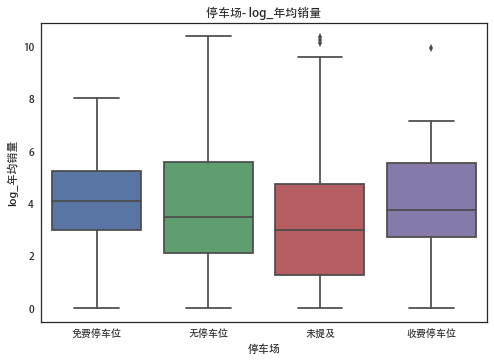

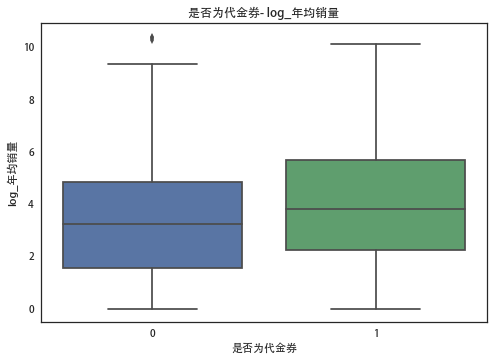

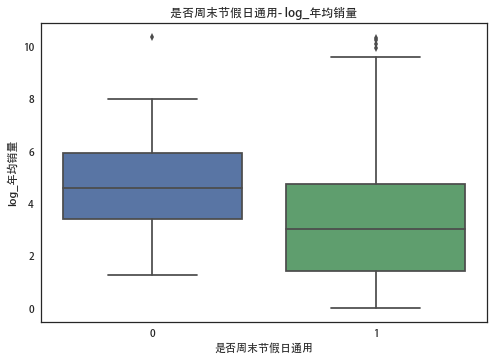

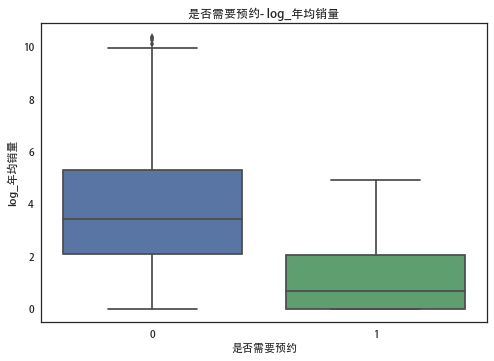

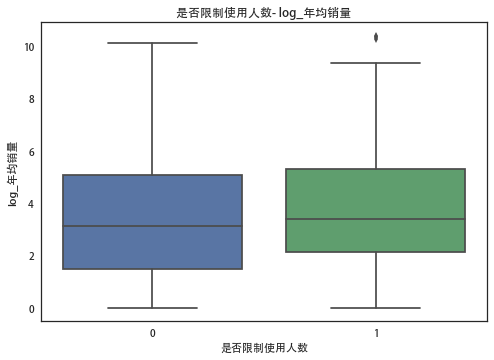

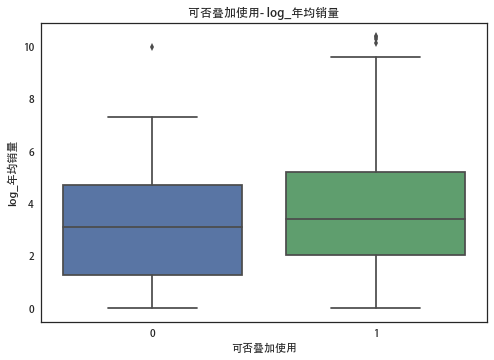

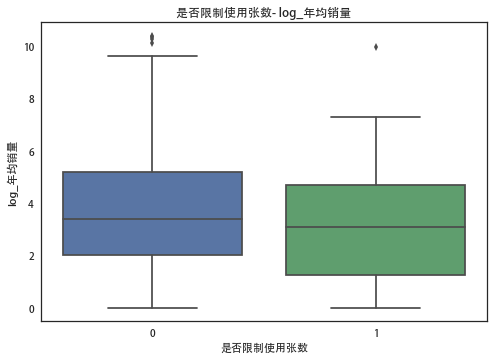

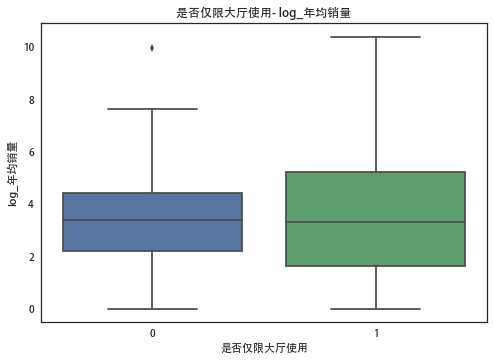

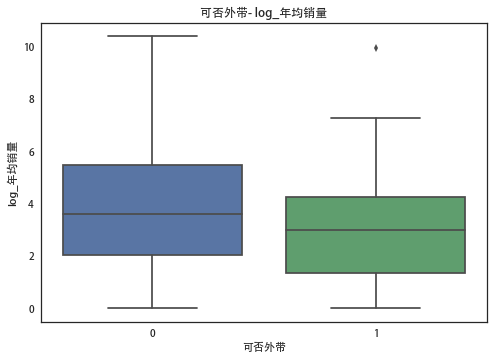

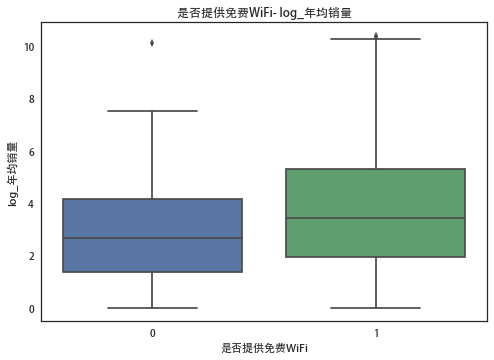

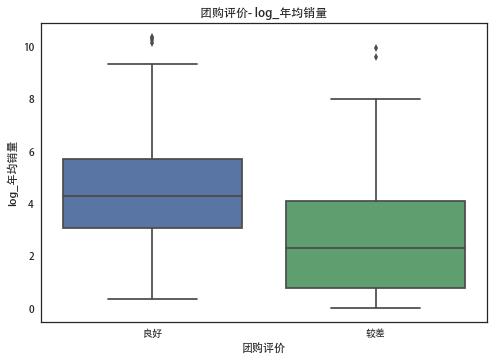

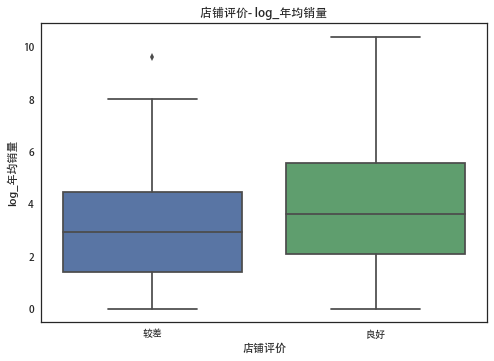

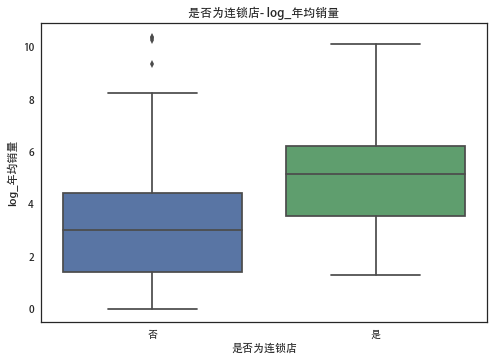

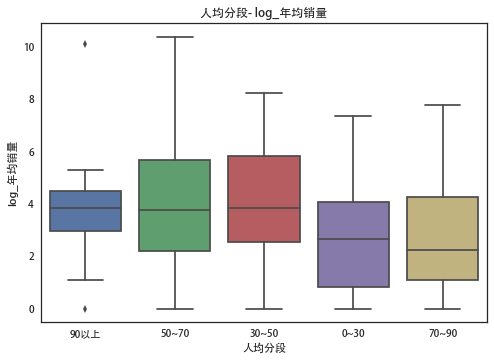

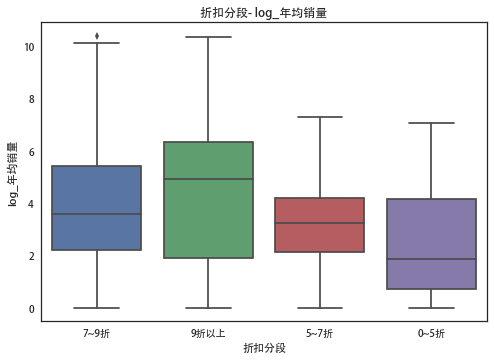

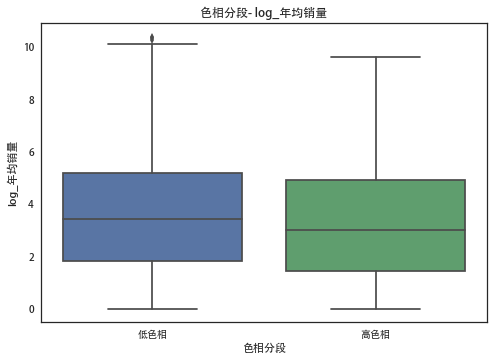

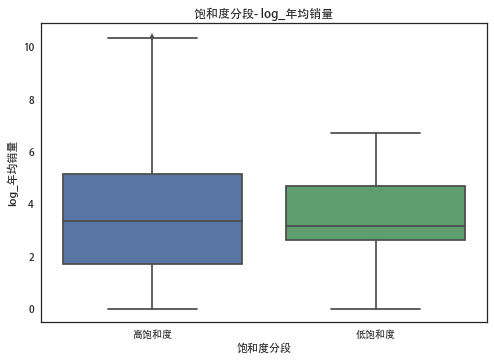

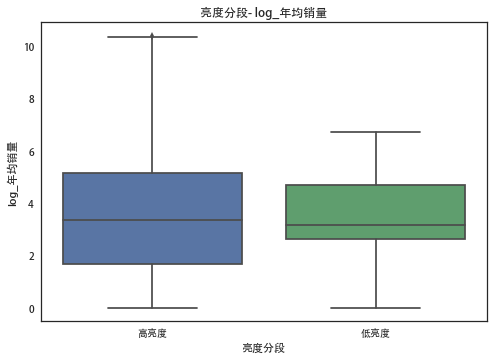

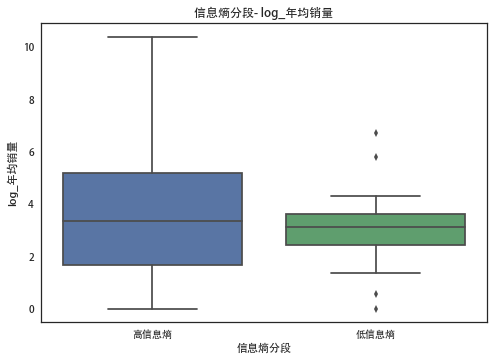

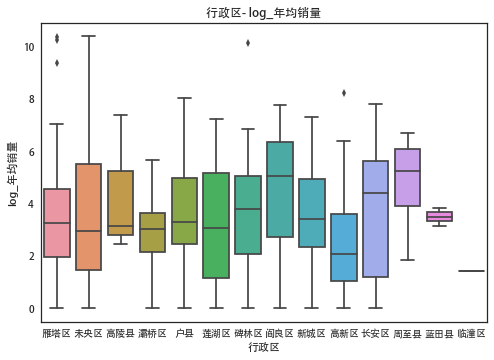

In [14]:
##绘制箱线图
print('西安各分类变量与年均销量的关系：')
cat_plot(西安)        #绘制西安各分类变量的箱线图

郑州各分类变量与年均销量的关系：


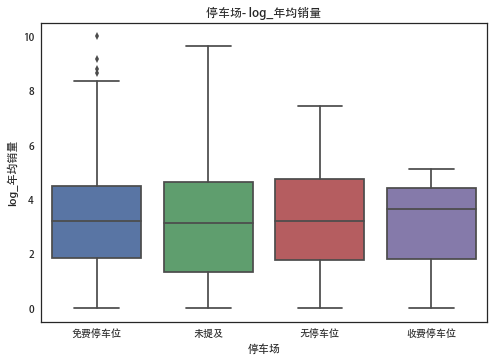

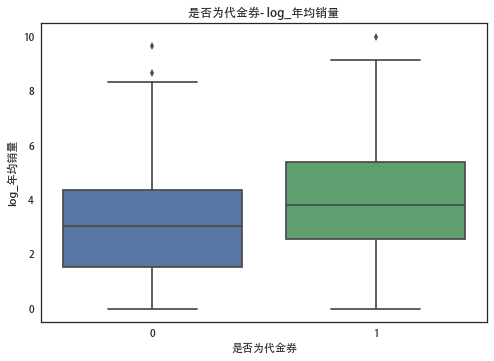

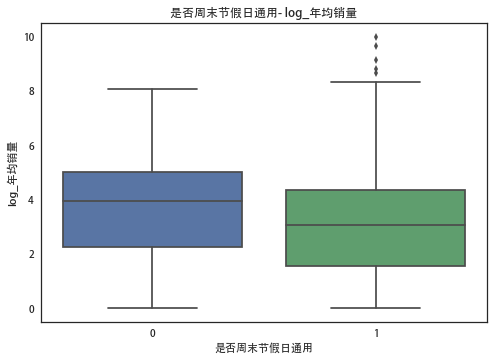

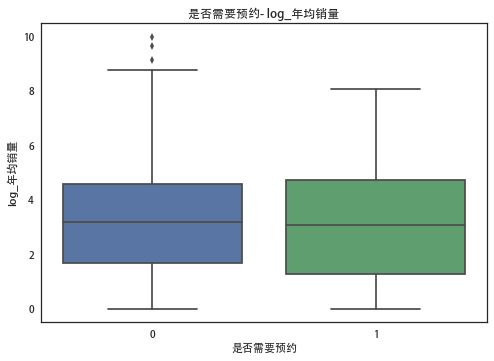

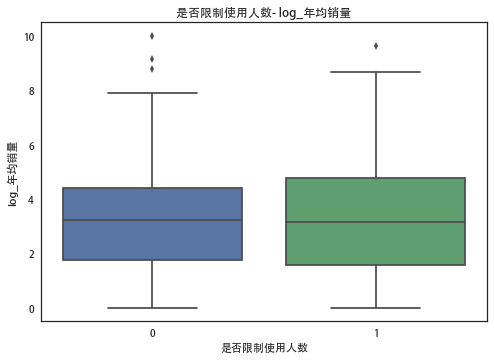

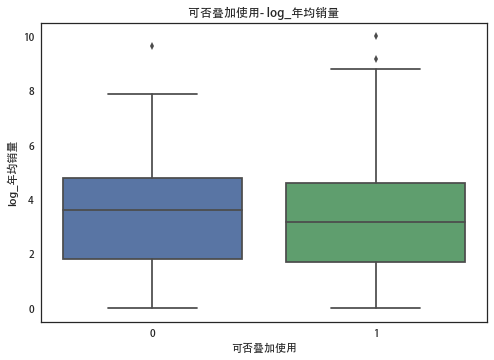

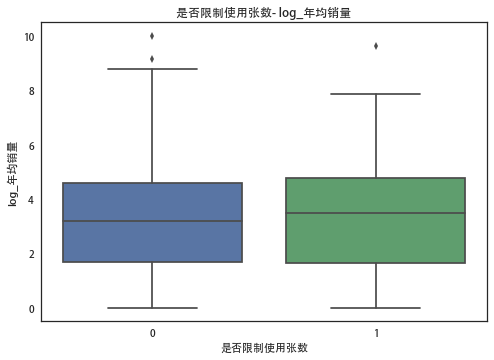

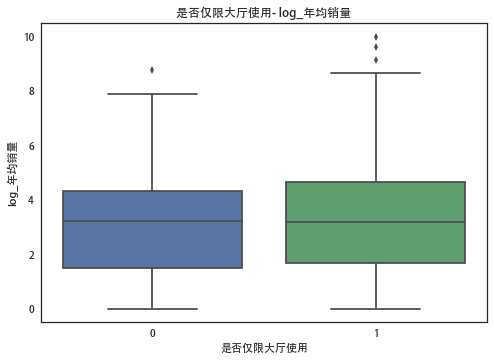

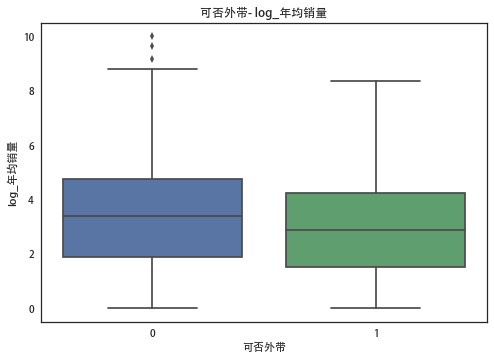

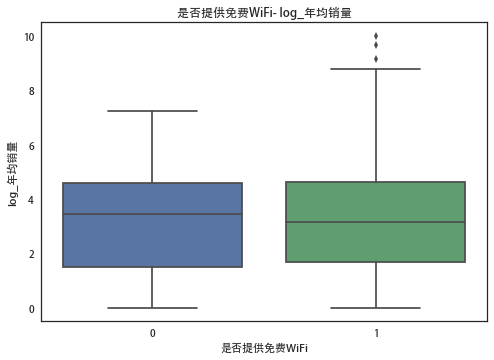

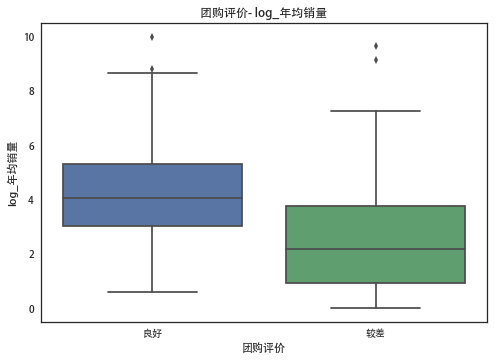

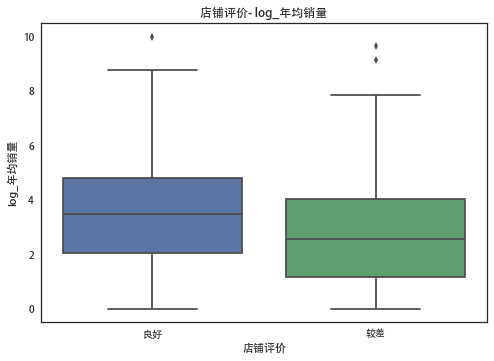

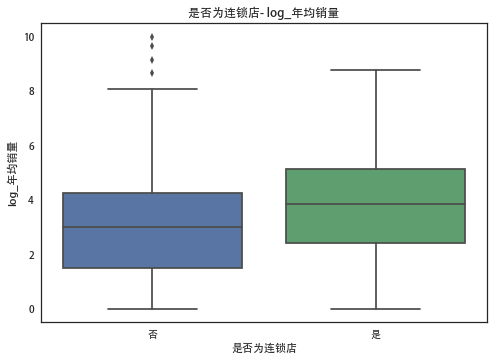

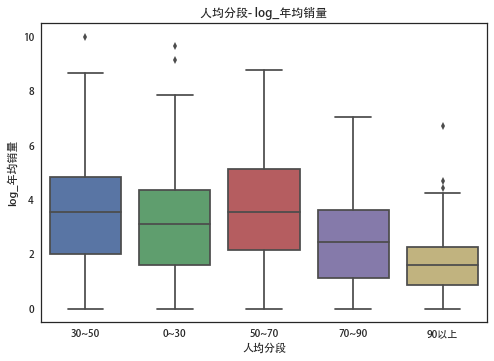

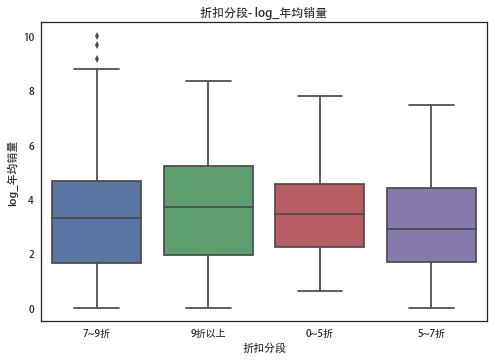

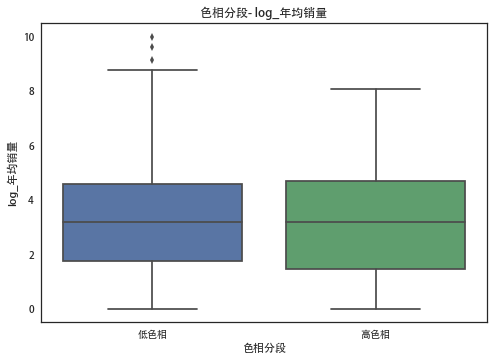

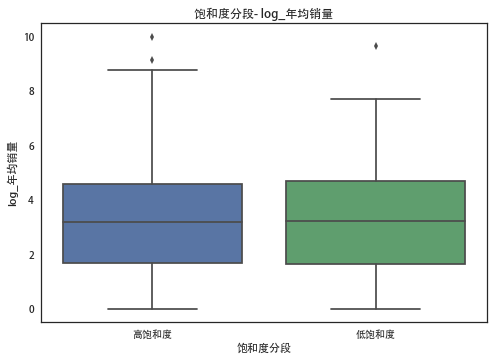

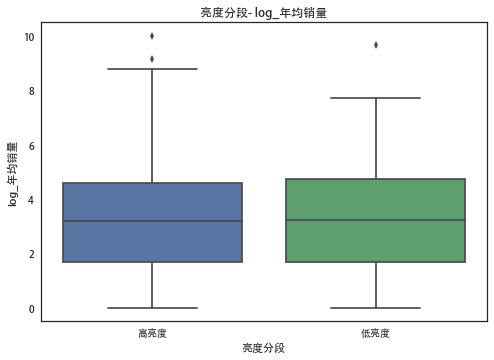

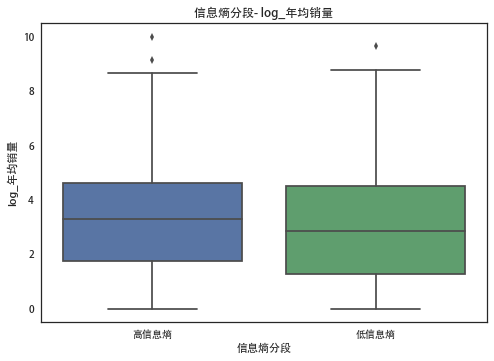

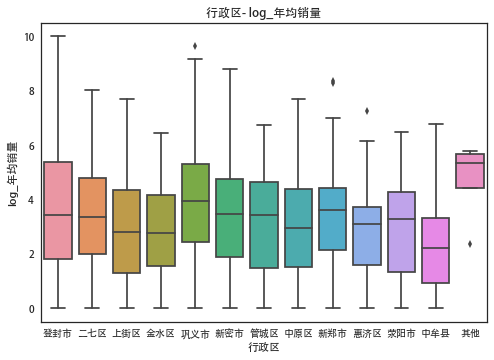

In [15]:
print('郑州各分类变量与年均销量的关系：') 
cat_plot(郑州)        #绘制郑州各分类变量的箱线图

#### 连续变量描述

In [16]:
##创建连续变量列表
num = ['log_团购评价数', 'log_图片数量', 'log_店铺评论数']

##创建散点图绘图函数
def num_plot(a):
    for i in num:
        plt.scatter(a[i], a['log_年均销量'])
        plt.xlabel(i)
        plt.ylabel('log_年均销量')
        plt.title(i + '- log_年均销量')
        plt.show()

西安各连续变量与年均销量的关系：


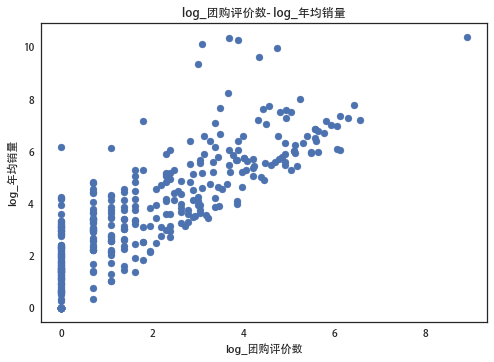

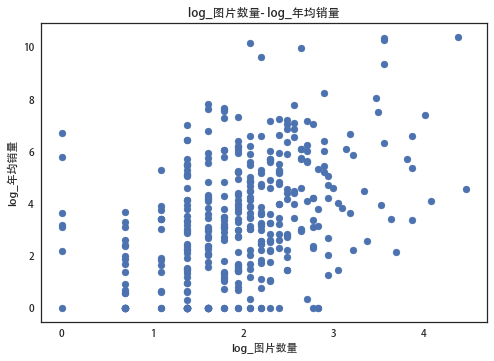

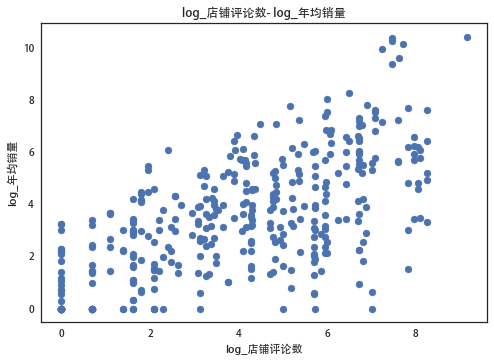

In [17]:
##绘制箱线图
print('西安各连续变量与年均销量的关系：')
num_plot(西安)      #绘制西安各连续变量的散点图

郑州各连续变量与年均销量的关系：


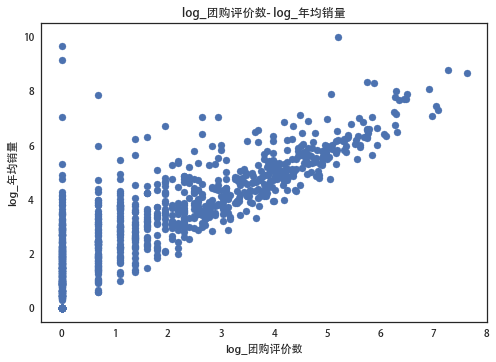

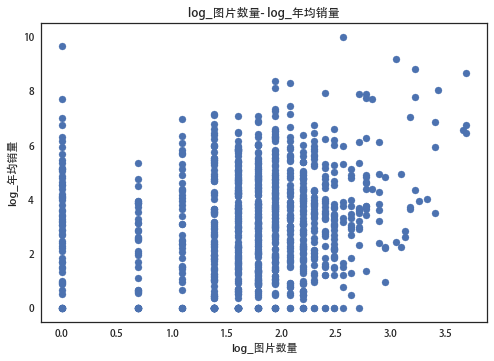

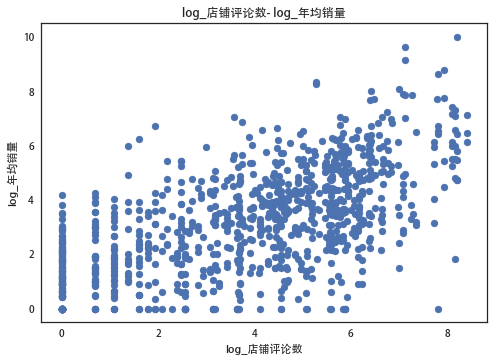

In [18]:
print('郑州各连续变量与年均销量的关系：')
num_plot(郑州)      #绘制郑州各连续变量的散点图

#### 文本变量描述

In [19]:
## 分别统计西安和郑州的热门菜品并通过树地图描述

##定义文本读取函数
def text_read(x):
    word = x.drop_duplicates()

    #生成文件
    word_file = open(os.path.join(path, '分词.txt', 'w+'))
    for i in word:
        tag = jieba.analyse.extract_tags(i)
        tags = ",".join(tag)
        word_file.write(tags)
    word_file.close()

    #读取文件
    word_list = open(os.path.join(path, '分词.txt', 'w+'))
    string_word = word_list.read()
    word_list.close()
    return string_word

##定义树地图绘制函数
def dish_treemap(a):
    string_word = text_read(a.菜品)
    seg = jieba.cut(string_word)
    words_list = []
    remove_words = ['暂无菜品', ',']
    for word in seg:
        if word not in remove_words:
            words_list.append(word)    

    #统计词频并选出前20
    dish_count = collections.Counter(words_list)
    dish_counts = pd.DataFrame.from_dict(dish_count, orient = 'index')
    dish_counts.columns = ['counts']
    top_20_dish = dish_counts.sort_values('counts', ascending = False).head(20)
    
    #画热门菜品前20的树地图
    squarify.plot(sizes = top_20_dish.counts,
             label = list(top_20_dish.index),
             color = sns.color_palette('Blues'),
              alpha = 0.6,
             edgecolor = 'white',
             linewidth = 2)
    plt.axis('off')
    plt.title('热门菜品前20')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wv/4ddg31gd5lg_5q8yjq7gdb9m0000gn/T/jieba.cache


西安的热门菜品：


Loading model cost 0.877 seconds.
Prefix dict has been built succesfully.


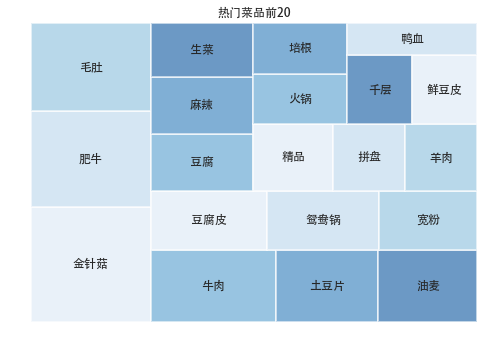

In [20]:
##绘制西安热门菜品树地图
print('西安的热门菜品：')
dish_treemap(西安)    #绘制西安菜品树地图

郑州的热门菜品：


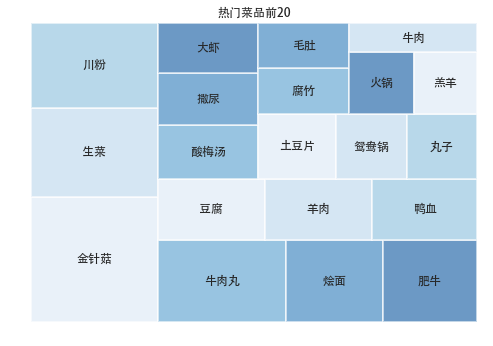

In [21]:
##绘制郑州热门菜品树地图
print('郑州的热门菜品：')
dish_treemap(郑州)    #绘制郑州菜品树地图

In [22]:
## 用词云分别描述西安和郑州的评论热词

#定义词云绘制函数
def comment_wordcloud(a):
    cloud_mask = np.array(Image.open(os.path.join(path, '228.png')))
    wc = WordCloud(background_color = "white",         #设置背景颜色
                   max_words = 1000,                             #设置最大显示的字数
                   mask = cloud_mask,
                   font_path = "/Library/Fonts/AdobeHeitiStd-Regular.otf",        #设置中文字体，使得词云可以显示
                   max_font_size = 500,                            #设置字体最大值
                   min_font_size = 20)                               #设置字体最小值  

    img_colors = ImageColorGenerator(cloud_mask)    #设置颜色
    text = text_read(a.评价内容)
    word = wc.generate(text)                                   #生成词云
    plt.imshow(wc.recolor(color_func = img_colors), interpolation="bilinear")    #绘制词云
    plt.axis("off")                                                   #不显示坐标轴

西安的评论词云：


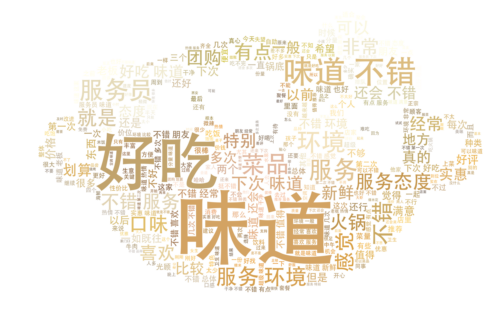

In [23]:
##绘制西安词云
print('西安的评论词云：')
comment_wordcloud(西安评论)    #绘制西安评论词云

郑州的评论词云：


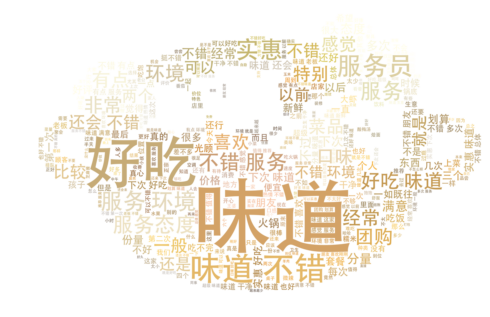

In [24]:
##绘制郑州词云
print('郑州的评论词云：')
comment_wordcloud(郑州评论)    #绘制郑州评论词云

## 建模求解

In [25]:
## 选出建模所需数据
var_list = ['log_年均销量', '停车场', '是否为代金券', '是否周末节假日通用', '是否需要预约', '是否限制使用人数', '可否叠加使用', 
            '是否限制使用张数', '是否仅限大厅使用', '可否外带', '是否提供免费WiFi', '团购评价', '店铺评价', '是否为连锁店', 
            '人均分段', '折扣分段', '色相分段', '饱和度分段', '亮度分段', '信息熵分段', '行政区','log_团购评价数', 'log_图片数量', 
            'log_店铺评论数', '内容丰富度', '有效期', '团购价', '市场价', '菜品丰富度', '店铺团购数量', '上线时长']

In [26]:
## 创建后向逐步回归函数

def backward_selected(data, response):
    """
    后向逐步回归算法
    使用AIC来评判新加的参数是否提高回归中的统计显著性
    Linear model designed by backward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
           evaluated by BIC
    """
    remaining = data.columns.values.tolist()                                               #定义变量保留项
    remaining.remove(response)                                                              #剔除因变量
    selected = []                                                                                    #已剔除掉的变量集合
    current_score, best_new_score = float('inf'), float('inf')                          #定义两个无穷大值为比较项
    while remaining and current_score == best_new_score:
        scores_with_candidates = []                                                          #定义变量的评分
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(set(remaining) - set([candidate])))   #写模型公式
            score = smf.ols(formula, data).fit().aic                                         #拟合模型并计算AIC
            scores_with_candidates.append((score, candidate))                      #写入变量评分
        scores_with_candidates.sort(reverse = True)                                    #按评分排序
        best_new_score, worst_candidate = scores_with_candidates.pop()      #选择AIC值最小的变量
        if current_score >= best_new_score:                                               #判断此时AIC值是否比之前更小
            remaining.remove(worst_candidate)                                            #从变量保留项中剔除变量
            selected.append(worst_candidate)                                              #写入已剔除掉的变量集合
            current_score = best_new_score                                                #令比较项相等
    formula = "{} ~ {} + 1".format(response, ' + '.join(remaining))                  #得出最优模型公式
    model = smf.ols(formula, data).fit()                                                    #拟合最优模型
 
    return model                                                                                   #返回模型

In [27]:
## 创建模型拟合函数
def fit_model(a):
    model = backward_selected(a[var_list], 'log_年均销量')    #应用后向逐步回归函数建模
    return model.summary()                                              #输出模型各项系数

In [28]:
#针对西安的数据进行建模
print('西安的建模结果：')
fit_model(西安)    #针对西安的数据建模

西安的建模结果：


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_年均销量   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     91.03
Date:                Mon, 01 Jul 2019   Prob (F-statistic):          1.56e-129
Time:                        18:11:48   Log-Likelihood:                -503.43
No. Observations:                 380   AIC:                             1051.
Df Residuals:                     358   BIC:                             1138.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6205      0.362      7.245      0.000       1.909       3.332
停车场[T.收费停车位]      -0.2240      0.237     -0.943      0.346      -0.691       0.243
停车场[T.无停车位]       -0.5811      0.170     -3.419      0.001      -0.915      -0.247
停车场[T.未提及]        -0.3564      0.140     -2.554      0.011      -0.631      -0.082
是否为代金券[T.1]        0.5645      0.133      4.238      0.000       0.303       0.827
是否周末节假日通用[T.1]     0.3409      0.147      2.312      0.021       0.051       0.631
是否需要预约[T.1]       -0.5639      0.191     -2.957      0.003      -0.939      -0.189
是否限制使用人数[T.1]      0.3710      0.118      3.139      0.002       0.139       0.603
可否外带[T.1]         -0.3888      0.114     -3.420      0.001      -0.612      -0.165
是否为连锁店[T.是]        0.3869      0.144      2.689      0.008       0.104       0.670
人均分段[T.30~50]     -0.3493      0.174     -2.009      0.045      -0.691      -0.007
人均分段[T.50~70]     -0.4154      0.177     -2.347      0.019      -0.763      -0.067
人均分段[T.70~90]     -0.3026      0.161     -1.878      0.061      -0.620       0.014
人均分段[T.90以上]       0.1589      0.221      0.719      0.472      -0.276       0.593
色相分段[T.高色相]       -0.2116      0.112     -1.897      0.059      -0.431       0.008
信息熵分段[T.高信息熵]     -0.6287      0.225     -2.800      0.005      -1.070      -0.187
log_团购评价数          0.9753      0.044     22.160      0.000       0.889       1.062
log_图片数量           0.2929      0.077      3.781      0.000       0.141       0.445
log_店铺评论数          0.2357      0.032      7.394      0.000       0.173       0.298
有效期               -0.0016      0.000     -3.406      0.001      -0.002      -0.001
店铺团购数量            -0.0753      0.027     -2.796      0.005      -0.128      -0.022
上线时长              -0.0006      0.000     -1.404      0.161      -0.001       0.000
==============================================================================
Omnibus:                        8.951   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               11.436
Skew:                           0.220   Prob(JB):                      0.00329
Kurtosis:                       3.727   Cond. No.                     8.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#针对郑州的数据进行建模
print('郑州的建模结果：')
fit_model(郑州)    #针对郑州的数据建模

郑州的建模结果：


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_年均销量   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:12:26   Log-Likelihood:                -1172.1
No. Observations:                 965   AIC:                             2408.
Df Residuals:                     933   BIC:                             2564.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5472      0.206      7.497      0.000       1.142       1.952
是否为代金券[T.1]         0.5943      0.073      8.125      0.000       0.451       0.738
是否需要预约[T.1]         0.3345      0.155      2.155      0.031       0.030       0.639
是否限制使用张数[T.1]       0.1902      0.101      1.874      0.061      -0.009       0.389
是否提供免费WiFi[T.1]     0.3398      0.085      3.996      0.000       0.173       0.507
团购评价[T.较差]         -0.0992      0.067     -1.482      0.139      -0.231       0.032
店铺评价[T.较差]          0.2003      0.067      3.008      0.003       0.070       0.331
人均分段[T.30~50]      -0.1870      0.074     -2.529      0.012      -0.332      -0.042
人均分段[T.50~70]      -0.0217      0.102     -0.213      0.831      -0.222       0.178
人均分段[T.70~90]       0.1965      0.153      1.284      0.200      -0.104       0.497
人均分段[T.90以上]       -0.0946      0.119     -0.796      0.426      -0.328       0.139
亮度分段[T.高亮度]        -0.3709      0.155     -2.387      0.017      -0.676      -0.066
行政区[T.中原区]          0.3283      0.160      2.050      0.041       0.014       0.642
行政区[T.中牟县]          0.2933      0.159      1.849      0.065      -0.018       0.605
行政区[T.二七区]          0.3728      0.175      2.135      0.033       0.030       0.715
行政区[T.其他]           0.2498      0.436      0.573      0.567      -0.606       1.105
行政区[T.巩义市]          0.5806      0.141      4.123      0.000       0.304       0.857
行政区[T.惠济区]          0.2555      0.196      1.302      0.193      -0.130       0.641
行政区[T.新密市]          0.4281      0.152      2.819      0.005       0.130       0.726
行政区[T.新郑市]          0.5116      0.144      3.554      0.000       0.229       0.794
行政区[T.登封市]          0.6247      0.175      3.577      0.000       0.282       0.967
行政区[T.管城区]          0.2627      0.159      1.651      0.099      -0.050       0.575
行政区[T.荥阳市]          0.0757      0.179      0.422      0.673      -0.276       0.427
行政区[T.金水区]          0.3031      0.138      2.188      0.029       0.031       0.575
log_团购评价数           0.9565      0.028     33.985      0.000       0.901       1.012
log_图片数量            0.2164      0.057      3.790      0.000       0.104       0.328
log_店铺评论数           0.1712      0.018      9.288      0.000       0.135       0.207
内容丰富度               0.0292      0.007      4.197      0.000       0.016       0.043
团购价                -0.0013      0.000     -3.183      0.002      -0.002      -0.001
菜品丰富度              -0.0040      0.002     -2.469      0.014      -0.007      -0.001
店铺团购数量             -0.0593      0.012     -4.933      0.000      -0.083      -0.036
上线时长               -0.0017      0.000    -13.152      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      186.614   Durbin-Watson:          